In [1]:
from utils import load_dataset, preprocess, extract_feature_target_columns
from models.lgb_model import LGBModel
from sklearn.model_selection import train_test_split

In [2]:
df = load_dataset("datasets/Bitfinex_BTCUSD_1h.csv")
df

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1.658710e+12,25/07/2022 00:00,BTC/USD,22578.00000,22663.27986,22268.00000,22294.00000,2.668725e+06,119.705976
1,1.658700e+12,24/07/2022 23:00,BTC/USD,22655.00000,22751.00000,22518.00000,22580.43245,1.499313e+06,66.398751
2,1.658700e+12,24/07/2022 22:00,BTC/USD,22814.00000,23006.00000,22552.31166,22655.00000,4.757591e+06,210.001830
3,1.658700e+12,24/07/2022 21:00,BTC/USD,22720.66998,22827.00000,22677.54867,22813.00000,1.378049e+06,60.406305
4,1.658690e+12,24/07/2022 20:00,BTC/USD,22714.01790,22799.00000,22677.00000,22722.00000,1.079021e+06,47.487931
...,...,...,...,...,...,...,...,...,...
35774,1.526378e+09,15/05/2018 10:00,BTC/USD,8708.10000,8855.70000,8695.80000,8784.40000,1.730972e+07,1969.080000
35775,1.526375e+09,15/05/2018 09:00,BTC/USD,8723.70000,8737.80000,8701.20000,8708.10000,2.054868e+06,235.550000
35776,1.526371e+09,15/05/2018 08:00,BTC/USD,8743.00000,8743.10000,8653.20000,8723.70000,8.891773e+06,1023.310000
35777,1.526368e+09,15/05/2018 07:00,BTC/USD,8739.00000,8754.80000,8719.30000,8743.00000,2.288904e+06,261.970000


In [3]:
df = preprocess(df)
X, y = extract_feature_target_columns(df)
X

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 792.42it/s]


,KMID,SMA_window_10
9,0.003667,0.008034
10,0.009959,0.002209
11,0.003403,-0.007751
12,-0.007576,-0.010450
13,0.006841,-0.001699
...,...,...
35769,0.001033,0.001870
35770,-0.027091,0.000159
35771,-0.002219,0.023384
35772,0.000776,0.022099


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
best_params = {'learning_rate': 0.05, 'n_estimators': 500, 'num_leaves': 3}

lgbr = LGBModel(best_params)
lgbr.fit(X_train, y_train, X_test, y_test)

[1]	training's l2: 0.000311092	valid_1's l2: 0.000306446
[2]	training's l2: 0.000307594	valid_1's l2: 0.000303151
[3]	training's l2: 0.000304347	valid_1's l2: 0.000299986
[4]	training's l2: 0.000301422	valid_1's l2: 0.000297172
[5]	training's l2: 0.000298701	valid_1's l2: 0.000294537
[6]	training's l2: 0.000296288	valid_1's l2: 0.000292276
[7]	training's l2: 0.000293985	valid_1's l2: 0.000290111
[8]	training's l2: 0.000291907	valid_1's l2: 0.00028814
[9]	training's l2: 0.000289888	valid_1's l2: 0.000286115
[10]	training's l2: 0.000288096	valid_1's l2: 0.000284103
[11]	training's l2: 0.000286376	valid_1's l2: 0.000282532
[12]	training's l2: 0.000284733	valid_1's l2: 0.000280864
[13]	training's l2: 0.000283244	valid_1's l2: 0.000279481
[14]	training's l2: 0.000281801	valid_1's l2: 0.000277905
[15]	training's l2: 0.000280491	valid_1's l2: 0.000276376
[16]	training's l2: 0.000279226	valid_1's l2: 0.000275141
[17]	training's l2: 0.000278052	valid_1's l2: 0.000273836
[18]	training's l2: 0.00

[278]	training's l2: 0.000253884	valid_1's l2: 0.000252653
[279]	training's l2: 0.000253879	valid_1's l2: 0.000252629
[280]	training's l2: 0.000253874	valid_1's l2: 0.000252631
[281]	training's l2: 0.000253866	valid_1's l2: 0.000252636
[282]	training's l2: 0.00025386	valid_1's l2: 0.000252657
[283]	training's l2: 0.000253853	valid_1's l2: 0.000252649
[284]	training's l2: 0.000253847	valid_1's l2: 0.000252672
[285]	training's l2: 0.000253844	valid_1's l2: 0.000252691
[286]	training's l2: 0.000253839	valid_1's l2: 0.000252711
[287]	training's l2: 0.000253835	valid_1's l2: 0.000252715
[288]	training's l2: 0.00025381	valid_1's l2: 0.00025276
[289]	training's l2: 0.000253805	valid_1's l2: 0.000252753
[290]	training's l2: 0.000253801	valid_1's l2: 0.000252772
[291]	training's l2: 0.000253796	valid_1's l2: 0.000252773
[292]	training's l2: 0.000253791	valid_1's l2: 0.000252743
[293]	training's l2: 0.000253785	valid_1's l2: 0.000252703
[294]	training's l2: 0.000253781	valid_1's l2: 0.000252682


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

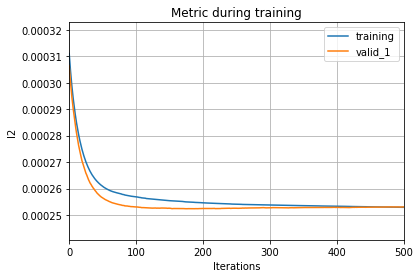

In [5]:
lgbr.plot_metric()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

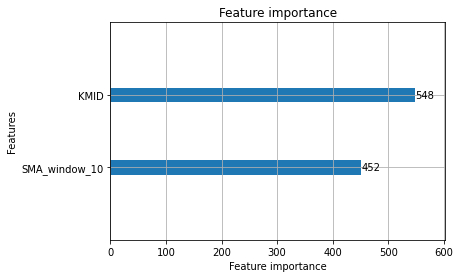

In [6]:
lgbr.plot_importance()

In [7]:
from models.mlp_model import MLPModel

In [ ]:
mlp = MLPModel(lr=1e-3)
mlp.fit(X_train, y_train, X_test, y_test, epochs=50)

Epoch 1/50


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 750.46it/s, eval_loss=0.0124]


Epoch 2/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 750.17it/s, eval_loss=0.000342]


Epoch 3/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 745.40it/s, eval_loss=0.000278]


Epoch 4/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 711.27it/s, eval_loss=0.000275]


Epoch 5/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 738.87it/s, eval_loss=0.000272]


Epoch 6/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 738.33it/s, eval_loss=0.000269]


Epoch 7/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 734.03it/s, eval_loss=0.000265]


Epoch 8/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 658.43it/s, eval_loss=0.000262]


Epoch 9/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 705.08it/s, eval_loss=0.00026]


Epoch 10/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 724.09it/s, eval_loss=0.000257]


Epoch 11/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 656.53it/s, eval_loss=0.000256]


Epoch 12/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 739.61it/s, eval_loss=0.000254]


Epoch 13/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 694.97it/s, eval_loss=0.000253]


Epoch 14/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 716.83it/s, eval_loss=0.000252]


Epoch 15/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 746.32it/s, eval_loss=0.000251]


Epoch 16/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 727.23it/s, eval_loss=0.000252]


Epoch 17/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 756.10it/s, eval_loss=0.000252]


Epoch 18/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 720.17it/s, eval_loss=0.000253]


Epoch 19/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 752.18it/s, eval_loss=0.000253]


Epoch 20/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 721.48it/s, eval_loss=0.000253]


Epoch 21/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 725.03it/s, eval_loss=0.000252]


Epoch 22/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 677.95it/s, eval_loss=0.000251]


Epoch 23/50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 752.83it/s, eval_loss=0.000251]


Epoch 24/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 722.86it/s, eval_loss=0.00025]


Epoch 25/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 706.94it/s, eval_loss=0.00025]


Epoch 26/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 730.17it/s, eval_loss=0.00025]


Epoch 27/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 716.28it/s, eval_loss=0.00025]


Epoch 28/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 733.36it/s, eval_loss=0.00025]


Epoch 29/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 737.16it/s, eval_loss=0.00025]


Epoch 30/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 709.82it/s, eval_loss=0.00025]


Epoch 31/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 666.49it/s, eval_loss=0.00025]


Epoch 32/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 712.18it/s, eval_loss=0.00025]


Epoch 33/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 722.68it/s, eval_loss=0.00025]


Epoch 34/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 695.88it/s, eval_loss=0.00025]


Epoch 35/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 733.56it/s, eval_loss=0.00025]


Epoch 36/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 623.81it/s, eval_loss=0.00025]


Epoch 37/50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 719.74it/s, eval_loss=0.00025]


Epoch 38/50


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 73/112 [00:00<00:00, 727.65it/s, eval_loss=0.000254]

In [ ]:
mlp.plot_metric()